In [2]:
# **************************** Start ************************************
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Läs in datafilen
df = pd.read_csv('housing.csv')

# Grundläggande information om dataset
print("Information om dataset:\n")
print(df.info())
print("\n")
# Kontrollera saknade värden och datasetets form
print("\nSaknade värden per kolumn:\n" )
print(df.isnull().sum())
print("\nForm på dataset:\n")
print(df.shape)
print("\n")

# Visa de tre första raderna
print("De tre första raderna i dataset:\n")
print(df.head(3))
print("\n")
print("Grundläggande statistik för dataset:\n")
print(df.describe())

Information om dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None



Saknade värden per kolumn:

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_i

207 rader utan sovrum. De får vara kvar.


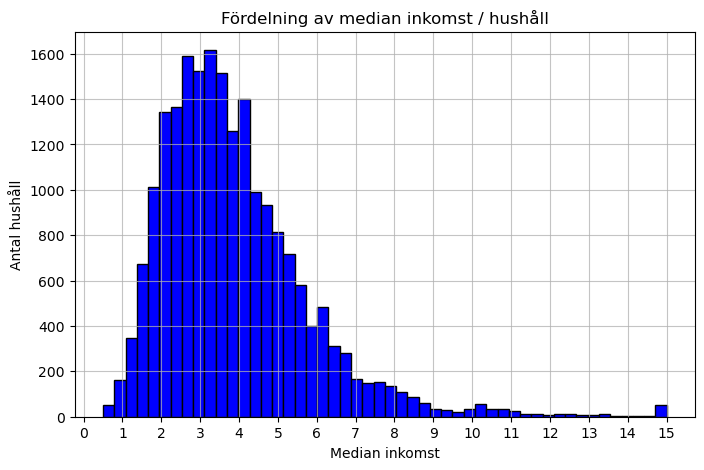

In [3]:
import matplotlib.pyplot as plt

# Skapa en figur och en ax-objekt
fig, ax = plt.subplots(figsize=(8, 5)) # 8 x 5 tum stor figur (ej något med pixlar ?!?!)

# Rita histogrammet
ax.hist(df['median_income'], bins=50, color='blue', edgecolor='black')
ax.grid(axis='both', alpha=0.75)
ax.set_xticks(range(0, 16, 1))

# Lägg till titlar och axel-etiketter
ax.set_title('Fördelning av median inkomst / hushåll')
ax.set_xlabel('Median inkomst')
ax.set_ylabel('Antal hushåll')

# Visa staplarna
plt.show()


Inkomstfördelning för området. De flesta hushåll (1500+) har runt '3' enheter i inkomst.

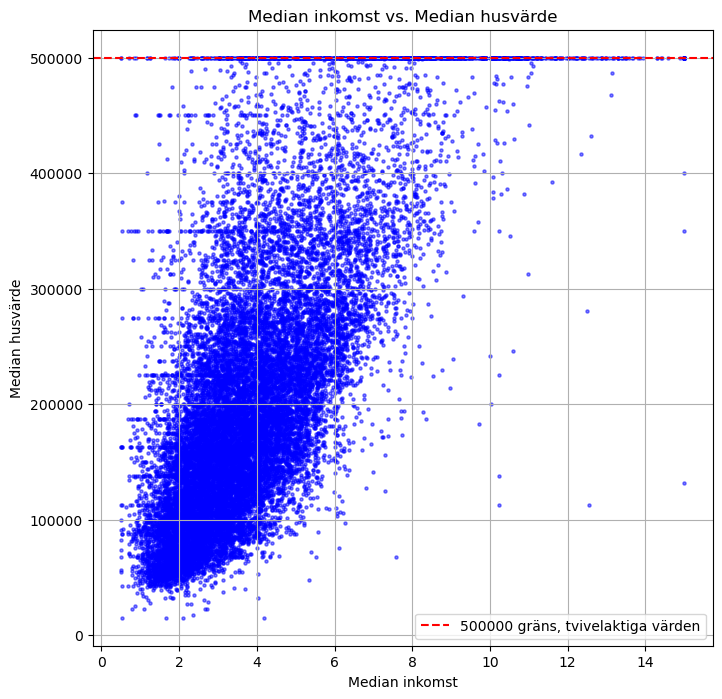

In [4]:
import matplotlib.pyplot as plt

# Skapa en figur och en ax
fig, ax = plt.subplots(figsize=(8, 8)) # 8 x 8 tum figur

# Plot data på ax
ax.scatter(df['median_income'], df['median_house_value'], alpha=0.5, c='blue', s=5)

# Lägg till titlar och axel-etiketter
ax.set_title('Median inkomst vs. Median husvärde')
ax.set_xlabel('Median inkomst')
ax.set_ylabel('Median husvärde')

# Visa grid
ax.grid(True)

ax.axhline(y=500000, color='r', linestyle='--', label='500000 gräns, tvivelaktiga värden')
ax.legend()
# Plotta
plt.show()

Det finns husvärden som är över 500k i DS, vilket illustreras av den horisontella linjen i scatterploten högst upp.    
Detta kan tyda på att det finns lyxigare bostäder i datasetet som drar upp medianvärdet, eller så kan det vara 
felaktiga (max)data som behöver undersökas närmare och kanske tas bort.

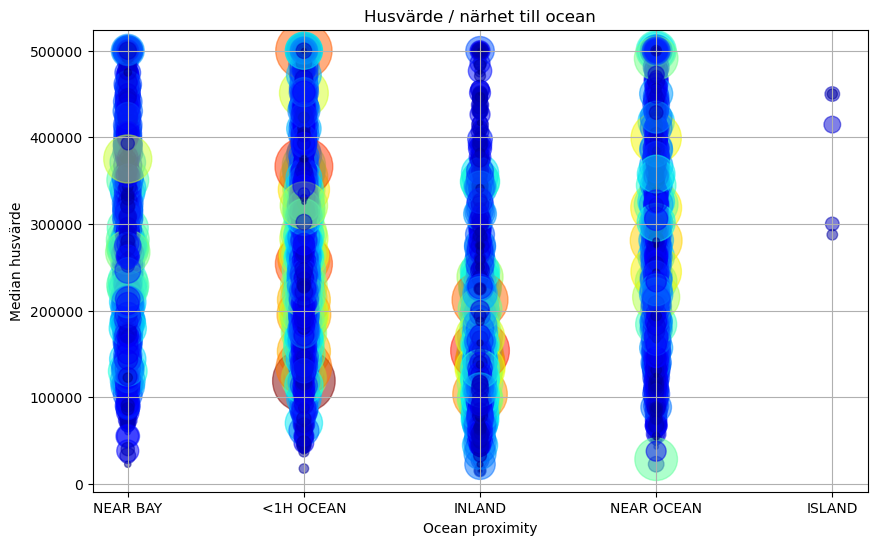

In [5]:
import matplotlib.pyplot as plt

# Skapa en figur och en ax-objekt
fig, ax = plt.subplots(figsize=(10, 6)) # 10 x 6 tum

# Lägg till titel och etiketter
ax.set_title('Husvärde / närhet till ocean')
ax.set_xlabel('Ocean proximity')
ax.set_ylabel('Median husvärde')

# Plot data på ax
sc = ax.scatter(x=df['ocean_proximity'], y=df['median_house_value'], alpha=0.5,
                c=df['households']/1000, s=df['households']/3,
                cmap='jet', label='Median house value')


# Visa rutnät
ax.grid(True)

# Visa plotten
plt.show()

Husvärde i förhållande till närheten av vatten (ocean). Cirkelns storlek illustrerar antal hushåll. "Island" har inte mycket data och vid fortsatt behandling tas bort alt flyttas och slås ihop med annan kategori.

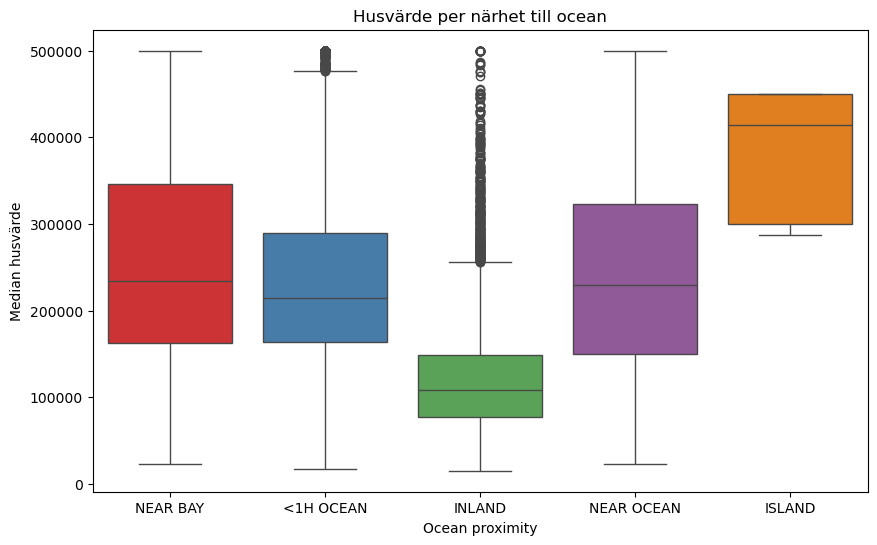

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Skapa en figur och en ax-objekt
fig, ax = plt.subplots(figsize=(10, 6))

# Skapa boxploten på ax-objektet
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, ax=ax, hue='ocean_proximity', palette='Set1', legend=False)

# Lägg till titel och etiketter
ax.set_title('Husvärde per närhet till ocean')
ax.set_xlabel('Ocean proximity')
ax.set_ylabel('Median husvärde')

# Visa plotten
plt.show()

Samma som föregående men med boxplot. Här ser man tydligare outliners (små svarta ringar). Lådan visar Q1 - Q3 (25-75%). Strecket Q2 (50%). 
Strecken utfrån lådan visar data inom 1.5x från Q1 och Q3 i resp riktning.

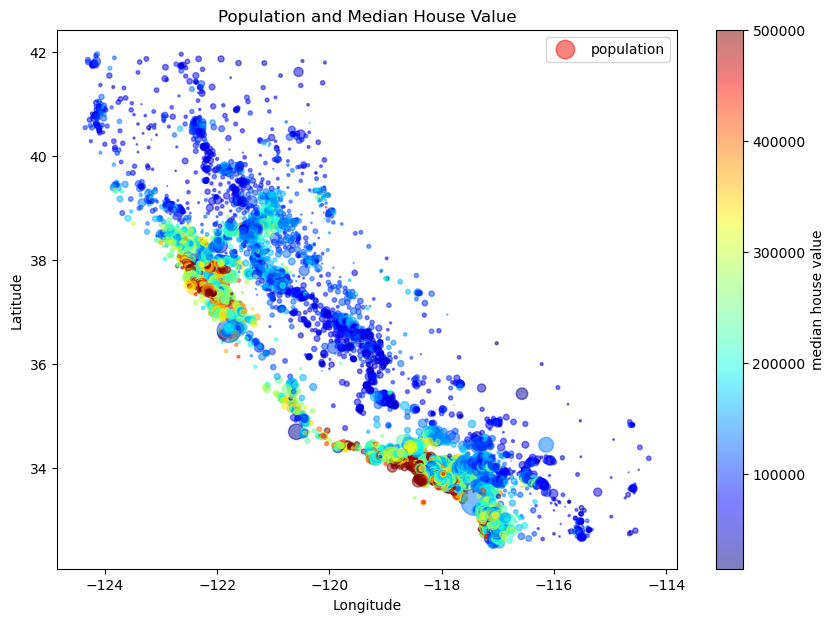

In [7]:

fig, ax = plt.subplots(figsize=(10,7)) # storlek 10 x 7 tum
# Axel titlar o rubrik  
ax.set_title('Population and Median House Value')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


# Display the background image
# ax.imshow(bg_img, extent=[f['longitude'].min(), f['longitude'].max(), f['latitude'].min(), f['latitude'].max()], aspect='auto')  # Adjust extent as needed

sc = ax.scatter(x=df['longitude'], y=df['latitude'], alpha=0.5,
                s=df['population']/100, c=df['median_house_value'],
                cmap='jet', label='population')
fig.colorbar(sc, ax=ax, label='median house value')
ax.legend()

Bilden visar en plotgraf där hushållen finns. Cirkelns storlek illustrerar befolkningstäthet, färgen värdet av hushåll. Koordinaterna visar västkusten i USA. Ju närmare vatten desto dyrare hus (se föreg graf).

In [20]:
# Ta fram de högsta och lägsta husvärden
top_houses = df.sort_values(by='median_house_value', ascending=False).head(10)
# Ta fram de högsta husvärden under 500000
top_houses_filtered = df.loc[df['median_house_value'] <= 499999].sort_values(by='median_house_value', ascending=False).head(10)

bottom_houses = df.sort_values(by='median_house_value').head(10)

# Avstånd från havet och koordinater
print("Topp 10 dyraste husen:\n", top_houses[['median_house_value', 'ocean_proximity','latitude', 'longitude']])
print("\n")
print("Topp 10 dyraste husen under 500000:\n", top_houses_filtered[['median_house_value', 'ocean_proximity','latitude', 'longitude']])
print("\n")
print("Topp 10 billigaste husen:\n", bottom_houses[['median_house_value', 'ocean_proximity','latitude', 'longitude']])

Topp 10 dyraste husen:
        median_house_value ocean_proximity  latitude  longitude
10667            500001.0       <1H OCEAN     33.55    -117.88
16916            500001.0      NEAR OCEAN     37.57    -122.34
16946            500001.0      NEAR OCEAN     37.55    -122.33
8877             500001.0       <1H OCEAN     34.04    -118.49
8878             500001.0       <1H OCEAN     34.04    -118.50
8879             500001.0       <1H OCEAN     34.04    -118.50
16941            500001.0      NEAR OCEAN     37.55    -122.34
16940            500001.0      NEAR OCEAN     37.55    -122.33
16939            500001.0      NEAR OCEAN     37.55    -122.32
16938            500001.0      NEAR OCEAN     37.56    -122.33


Topp 10 dyraste husen under 500000:
        median_house_value ocean_proximity  latitude  longitude
10652            499100.0       <1H OCEAN     33.55    -117.77
1639             499000.0        NEAR BAY     37.89    -122.18
18083            498800.0       <1H OCEAN     37.33    

De dyraste husen ligger nära vatten vilket visas också i boxplotten ovan. Värdet 500k är högsta värdet i DS därför kan tabellen "De 10 dyraste husen" vara felaktig. Tabell 2 är filtrerad.

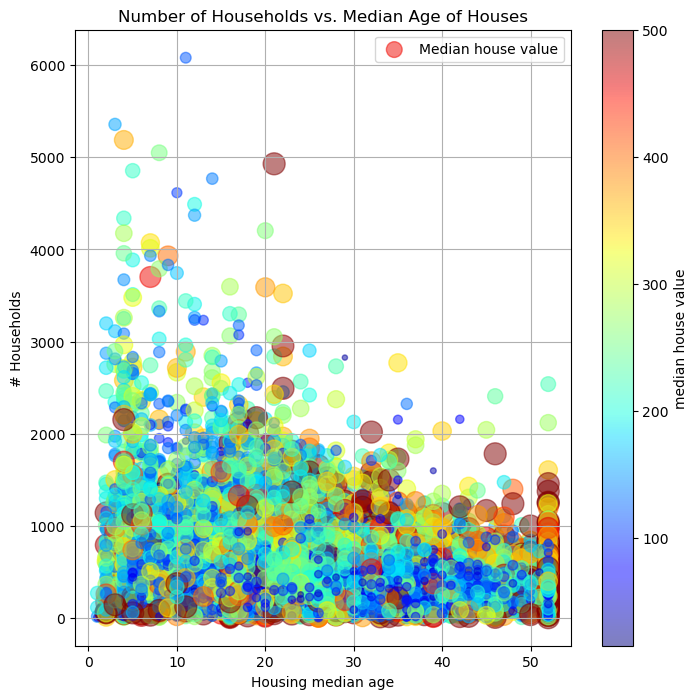

In [33]:
import matplotlib.pyplot as plt

# Skapa en figur och en ax-objekt
fig, ax = plt.subplots(figsize=(8, 8))

# Sätt titel och etiketter
ax.set_title('Number of Households vs. Median Age of Houses')
ax.set_xlabel('Housing median age')
ax.set_ylabel('# Households')


# Plot data på ax
sc = ax.scatter(x=df['housing_median_age'], y=df['households'], alpha=0.5,
                c=df['median_house_value']/1000, s=df['median_house_value']/2000,
                cmap='jet', label='Median house value')
fig.colorbar(sc, ax=ax, label='median house value')
ax.legend() # Lägg till legend

# Visa rutnät
ax.grid(True)

# Visa diagrammet
plt.show()

Grafen visar antal hushåll i olika ålder. Den utplottade cirkelns färg och storlek illustrerar värdet på husen.